## Gather

In [3]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt

In [4]:
# df1 has twitter-archive-enhanced-2
df1=pd.read_csv('C:/Users/bijad/Desktop/norahpro5/twitter-archive-enhanced-2.csv')

In [5]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
df1.shape

(2356, 17)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [100]:
# Extract the tweet_id 

In [8]:
df1.tweet_id=df1.expanded_urls.str.extract('(\d{18})')
df1.tweet_id[0:5]

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: object

In [9]:
url= requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_prediction-3.tsv',mode='wb')as file:
    file.write(url.content)
# df2 has image_prediction.tsv  
df2=pd.read_csv('image_prediction-3.tsv',delimiter='\t')

In [10]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [101]:
# Declare Twitter API keys and access tokens

In [11]:
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [12]:
# List of dictionaries to read tweet-JSON data line by line 
df3_list = []
with open('C:/Users/bijad/Desktop/norahpro5/tweet-json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df3_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count']
                        })

# Create a DataFrame df3 with tweet ID, retweet count, favorite count 
df3 = pd.DataFrame(df3_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [13]:
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [14]:
df3.tail(5)

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


## Assess

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2190 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [16]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [17]:
df1.isnull().sum()

tweet_id                       166
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
df1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
df1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Quality

- Some tweet_ID is missing, and the tweet_ID is not the right data type.
- Erroneous datatypes and values for in_reply_to_status_id,in_reply_to_user_id, and timestamp. 
- Using only tweet_id with images.
- In twitter-archive-enhanced, which is df1, some ratings are wrong such as:
  rating_numerator column has values < 10 as well as some very large numbers like 1776.
  Also, rating_denominator column has values not equal to 10.
- Some dog names are not correct with lowercase characters.



#### Tidiness
- Columns in df1 `retweeted_status_id', 'retweeted_status_user_id' ,and 'retweeted_status_timestamp` are not needed, which can   be dropped.
- The four columns in df 1 which are `doggo, floof, pupper and puppo` should be merged into one column named `stage`
- `retweet_count and favorite_count`  columns from df3  table should be joined with df1.
- `rating_numerator and rating_denominator` should be merged into one column named `rating`.

## Clean

In [31]:
df1_clean = df1.copy()

In [32]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2190 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

### Quality

#### Using only tweet_id with images.

##### Define
*Choose tweet_id with image.*

##### Code

In [35]:
df2_clean = df2.copy()

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [37]:
df2_clean.tweet_id=df2_clean.tweet_id.astype(str)
id_withimage=df2_clean[['tweet_id']]
df1_clean=pd.merge(df1_clean,id_withimage,on='tweet_id')

##### Test

In [38]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 233.7+ KB


#### Erroneous datatypes and values for in_reply_to_status_id,in_reply_to_user_id, and timestamp.

##### Define
*Convert the following: in_reply_to_status_id and in_reply_to_user_id to data type integer. And, Convert timestamp to datetime data type.*

##### Code

In [39]:
df1_clean.in_reply_to_status_id = df1_clean.in_reply_to_status_id.fillna(0)
df1_clean.in_reply_to_user_id = df1_clean.in_reply_to_user_id.fillna(0)

df1_clean.in_reply_to_status_id = df1_clean.in_reply_to_status_id.astype(np.int64)
df1_clean.in_reply_to_user_id = df1_clean.in_reply_to_user_id.astype(np.int64)

df1_clean.timestamp = pd.to_datetime(df1_clean.timestamp)

##### Test

In [40]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null int64
in_reply_to_user_id      1994 non-null int64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 233.7+ KB


#### Some dog names are not correct with lowercase characters.

##### Define
*Set wrong names to the value 'None' and replace 'None' with np.nan.*

##### Code

In [85]:
df1_clean.loc[df1_clean.name.str.islower(),'name']='None'
df1_clean.name=df1_clean.name.replace('None',np.nan)

##### Test

In [86]:
df1_clean.name.value_counts()

Charlie       11
Lucy          10
Cooper        10
Oliver        10
Tucker        9 
Penny         9 
Sadie         8 
Winston       8 
Lola          7 
Toby          7 
Daisy         7 
Koda          6 
Bella         6 
Jax           6 
Bo            6 
Stanley       6 
Scout         5 
Chester       5 
Buddy         5 
Dave          5 
Louis         5 
Bailey        5 
Leo           5 
Milo          5 
Rusty         5 
Oscar         5 
Jack          4 
Dexter        4 
Chip          4 
George        4 
             .. 
Trevith       1 
Rontu         1 
Kenzie        1 
Pablo         1 
Spark         1 
Franq         1 
Arlen         1 
Rizzy         1 
Staniel       1 
Stephanus     1 
Ziva          1 
Adele         1 
Ebby          1 
Ozzy          1 
Koko          1 
Eriq          1 
Dale          1 
Sailer        1 
Clifford      1 
Willie        1 
Kulet         1 
Iroh          1 
Longfellow    1 
Loomis        1 
Jazzy         1 
Lucky         1 
Bonaparte     1 
Jessiga       

### Tidiness

#### Columns in df1_clean retweeted_status_id', 'retweeted_status_user_id' ,and 'retweeted_status_timestamp are not needed, which can be dropped.

##### Define
*Delete the following columns: retweeted_status_id', 'retweeted_status_user_id' ,and 'retweeted_status_timestamp .*

##### Code

In [33]:
df1_clean=df1_clean[df1.tweet_id.notnull()]
df1_clean=df1_clean[df1.retweeted_status_id.isnull()]
df1_clean=df1_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


##### Test

In [34]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2023 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2023 non-null object
source                   2023 non-null object
text                     2023 non-null object
expanded_urls            2023 non-null object
rating_numerator         2023 non-null int64
rating_denominator       2023 non-null int64
name                     2023 non-null object
doggo                    2023 non-null object
floofer                  2023 non-null object
pupper                   2023 non-null object
puppo                    2023 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 237.1+ KB


#### The four columns in df 1 which are doggo, floof, pupper and puppo should be merged into one column named stage.

##### Define
*Create column 'stage' to show dog stage,THEN drop columns 'doggo','floofer','pupper','puppo'. 
Replace 'None' with np.nan.*

##### Code

In [41]:
df1_clean.doggo=df1_clean.doggo.replace('None','')
df1_clean.floofer=df1_clean.floofer.replace('None','')
df1_clean.pupper=df1_clean.pupper.replace('None','')
df1_clean.puppo=df1_clean.puppo.replace('None','')
df1_clean['stage']=df1_clean.doggo.str.cat(df1_clean.floofer).str.cat(df1_clean.pupper).str.cat(df1_clean.puppo)
df1_clean=df1_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)
df1_clean.stage=df1_clean.stage.replace('',np.nan)

##### Test

In [42]:
df1_clean.info()
df1_clean.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 11 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null int64
in_reply_to_user_id      1994 non-null int64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
stage                    306 non-null object
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 186.9+ KB


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,0,0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,0,0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,0,0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,0,0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,0,0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


#### retweet_count and favorite_count columns from df3 should be joined with df1_claen.

##### Define
*Join df3_clean into df1_clean using tweet_id.*

##### Code

In [46]:
df3_clean = df3.copy()
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [54]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 11 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null int64
in_reply_to_user_id      1994 non-null int64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
stage                    306 non-null object
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 186.9+ KB


In [57]:
print(df1_clean.tweet_id.count())
print(df3_clean.tweet_id.count())

1994
2354


In [67]:
df3_clean['tweet_id']= df3_clean['tweet_id'].astype(str)
df1_clean['tweet_id']= df1_clean['tweet_id'].astype(str)

In [68]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 11 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null int64
in_reply_to_user_id      1994 non-null int64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
stage                    306 non-null object
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 186.9+ KB


In [69]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 73.6+ KB


In [70]:
df1_clean = pd.merge(df1_clean, df3_clean, on='tweet_id', how = 'inner')

In [71]:
df1_clean.tweet_id.count()

1994

In [73]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 13 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null int64
in_reply_to_user_id      1994 non-null int64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
stage                    306 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 218.1+ KB


In [74]:
df1_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,0,0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467
1,892177421306343426,0,0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819
2,891815181378084864,0,0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,25461
3,891689557279858688,0,0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,42908
4,891327558926688256,0,0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,41048


#### rating_numerator and rating_denominator should be merged into one column named rating.

##### Define
*Create new column in df1_clean rating=rating_numerator/rating_denominator. And, Drop rating_numerator and rating_denominator.*

##### Code

In [75]:
pd.set_option('display.max_colwidth', -1)
df1_clean.loc[df1_clean.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
323,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
385,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
662,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
800,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
848,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
891,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
925,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
946,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
970,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
988,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [76]:
df1_clean=df1_clean[df1_clean.tweet_id!='810984652412424192']
df1_clean.loc[df1_clean.tweet_id=='740373189193256964',['rating_numerator','rating_denominator']]=[14,10]
df1_clean.loc[df1_clean.tweet_id=='722974582966214656',['rating_numerator','rating_denominator']]=[13,10]
df1_clean.loc[df1_clean.tweet_id=='716439118184652801',['rating_numerator','rating_denominator']]=[11,10]
df1_clean.loc[df1_clean.tweet_id=='682962037429899265',['rating_numerator','rating_denominator']]=[10,10]
df1_clean.loc[df1_clean.tweet_id=='666287406224695296',['rating_numerator','rating_denominator']]=[9,10]


df1_clean['rating']=df1_clean.rating_numerator/df1_clean.rating_denominator
df1_clean=df1_clean.drop(['rating_numerator','rating_denominator'],axis=1)

df1_clean.loc[df1_clean.rating>2,['tweet_id','text','rating']]

,tweet_id,text,rating
503,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",7.5
553,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,2.7
726,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,177.6
1374,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,2.6
1718,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,42.0


In [78]:
df1_clean.loc[df1_clean.tweet_id=='786709082849828864','rating']=1.0
df1_clean.loc[df1_clean.tweet_id=='778027034220126208','rating']=1.1
df1_clean.loc[df1_clean.tweet_id=='680494726643068929','rating']=1.1
df1_clean=df1_clean[df1_clean.rating<2]

##### Test

In [80]:
df1_clean.rating.unique()

array([1.3, 1.2, 1.4, 0.5, 1.1, 0.6, 1. , 0. , 0.3, 0.7, 0.8, 0.9, 0.4,
       0.2, 0.1])

In [81]:
df1_clean.rating.value_counts()

1.2    454
1.0    422
1.1    405
1.3    262
0.9    152
0.8    95 
0.7    51 
1.4    36 
0.5    33 
0.6    32 
0.3    19 
0.4    15 
0.2    9  
0.1    4  
0.0    2  
Name: rating, dtype: int64

In [82]:
df1_clean.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,rating
count,1.991000e+03,1.991000e+03,1991.000000,1991.000000,1991.000000
mean,8.061103e+15,4.848349e+07,2766.526871,8899.343044,1.055450
std,7.472583e+16,4.485921e+08,4678.024127,12221.969511,0.217822
min,0.000000e+00,0.000000e+00,16.000000,81.000000,0.000000
25%,0.000000e+00,0.000000e+00,623.500000,1976.000000,1.000000
50%,0.000000e+00,0.000000e+00,1350.000000,4127.000000,1.100000
75%,0.000000e+00,0.000000e+00,3220.000000,11321.000000,1.200000
max,8.558181e+17,4.196984e+09,79515.000000,132810.000000,1.400000


### Storing Data

In [87]:
df1_clean.to_csv('twitter_archive_master.csv', index=False)

### Analyzing and Visualizing Data

In [88]:
df1_clean.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,rating
count,1.991000e+03,1.991000e+03,1991.000000,1991.000000,1991.000000
mean,8.061103e+15,4.848349e+07,2766.526871,8899.343044,1.055450
std,7.472583e+16,4.485921e+08,4678.024127,12221.969511,0.217822
min,0.000000e+00,0.000000e+00,16.000000,81.000000,0.000000
25%,0.000000e+00,0.000000e+00,623.500000,1976.000000,1.000000
50%,0.000000e+00,0.000000e+00,1350.000000,4127.000000,1.100000
75%,0.000000e+00,0.000000e+00,3220.000000,11321.000000,1.200000
max,8.558181e+17,4.196984e+09,79515.000000,132810.000000,1.400000


In [90]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1993
Data columns (total 12 columns):
tweet_id                 1991 non-null object
in_reply_to_status_id    1991 non-null int64
in_reply_to_user_id      1991 non-null int64
timestamp                1991 non-null datetime64[ns]
source                   1991 non-null object
text                     1991 non-null object
expanded_urls            1991 non-null object
name                     1348 non-null object
stage                    306 non-null object
retweet_count            1991 non-null int64
favorite_count           1991 non-null int64
rating                   1991 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 202.2+ KB


In [91]:
values=np.sort(df1_clean.rating.unique())
values

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4])

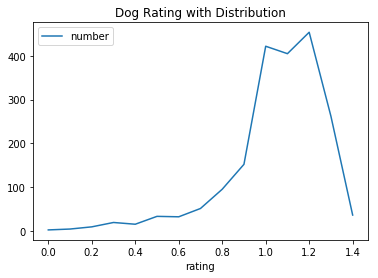

In [125]:
rating_analyze=pd.DataFrame(columns=['rating','number','retweet','favorite'])
rating_analyze['rating']=values
for x in rating_analyze['rating']:
    this_df=df1_clean[df1_clean.rating==x]
    rating_analyze.loc[rating_analyze.rating==x,'number']=this_df['tweet_id'].count()
    rating_analyze.loc[rating_analyze.rating==x,'retweet']=this_df.retweet_count.mean()
    rating_analyze.loc[rating_analyze.rating==x,'favorite']=this_df.favorite_count.mean()
rating_analyze[['rating','number']].plot(x='rating',kind='line', title='Dog Rating with Distribution')
plt.savefig('Dog Rating with Distribution')

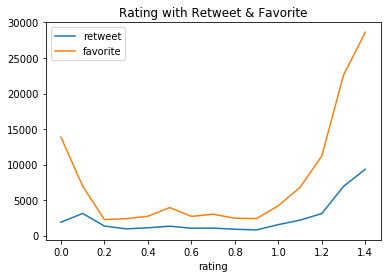

In [126]:
rating_analyze=pd.DataFrame(columns=['rating','number','retweet','favorite'])
rating_analyze['rating']=values
for x in rating_analyze['rating']:
    this_df=df1_clean[df1_clean.rating==x]
    rating_analyze.loc[rating_analyze.rating==x,'number']=this_df['tweet_id'].count()
    rating_analyze.loc[rating_analyze.rating==x,'retweet']=this_df.retweet_count.mean()
    rating_analyze.loc[rating_analyze.rating==x,'favorite']=this_df.favorite_count.mean()
rating_analyze[['rating','retweet','favorite']].plot(x='rating',title='Rating with Retweet & Favorite')
plt.savefig('Rating with Retweet & Favorite')

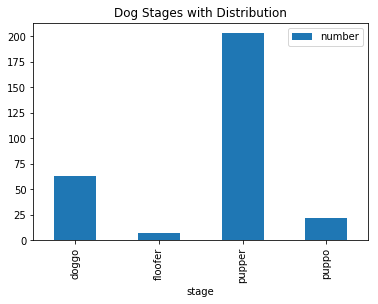

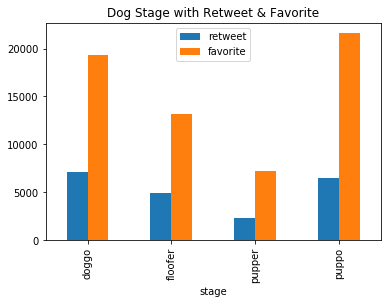

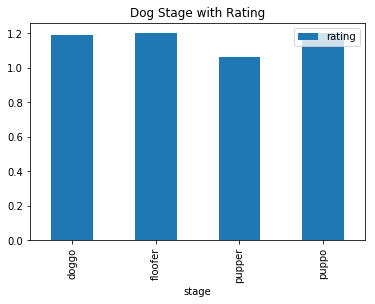

In [123]:
stage_analyze=pd.DataFrame(columns=['stage','number','rating','retweet','favorite'])
stage_analyze['stage']=['doggo','floofer','pupper','puppo']
for each_stage in stage_analyze.stage:
    stage_df=df1_clean[df1_clean.stage==each_stage]
    stage_analyze.loc[stage_analyze.stage== each_stage,'number']=stage_df.shape[0]
    stage_analyze.loc[stage_analyze.stage== each_stage,'rating']=stage_df['rating'].mean()
    stage_analyze.loc[stage_analyze.stage== each_stage,'retweet']=stage_df['retweet_count'].mean()
    stage_analyze.loc[stage_analyze.stage== each_stage,'favorite']=stage_df['favorite_count'].mean()
stage_analyze[['stage','number']].plot(x='stage',kind='bar',title='Dog Stages with Distribution')
plt.savefig('Dog Stages with Distribution')
stage_analyze[['stage','retweet','favorite']].plot(x='stage',kind='bar',title='Dog Stage with Retweet & Favorite')
plt.savefig('Dog Stage with Retweet & Favorite')
stage_analyze[['stage','rating']].plot(x='stage',kind='bar',title='Dog Stage with Rating')
plt.savefig('Dog Stage with Rating')

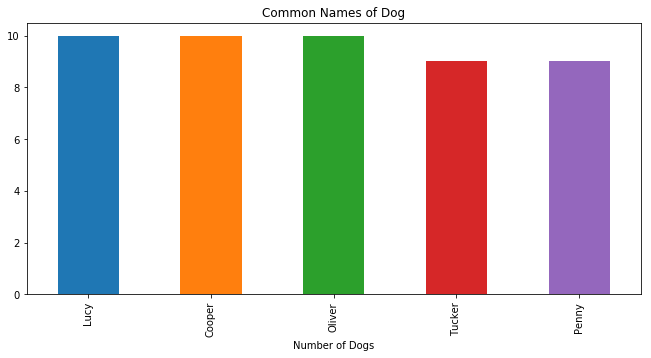

In [124]:
df1_clean.name.value_counts()[1:6].plot('bar', figsize=(11,5), title='Common Names of Dog').set_xlabel("Number of Dogs")
plt.savefig('Common Names of Dog')